In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

############## Read Input

train_1 = pd.read_csv("DS1_train.csv")
train_1.drop(['Unnamed: 0'], axis=1, inplace=True)
test_1 = pd.read_csv("DS1_test.csv")
test_1.drop(["Unnamed: 0"], axis=1, inplace=True)
train_2 = pd.read_csv("DS2_train.csv")
train_2.drop(["Unnamed: 0"], axis=1, inplace=True)
test_2 = pd.read_csv("DS2_test.csv")
test_2.drop(["Unnamed: 0"], axis=1, inplace=True)
train_3 = pd.read_csv("DS3_train.csv")
train_3.drop(["Unnamed: 0"], axis=1, inplace=True)
test_3 = pd.read_csv("DS3_test.csv")
test_3.drop(["Unnamed: 0"], axis=1, inplace=True)

############## Orginial on the testing dataset

test_1_disease = test_1[test_1["Target"] == 1]
test_1_disease = test_1_disease["ProteinID"].tolist()

test_2_disease = test_2[test_2["Target"] == 1]
test_2_disease = test_2_disease["ProteinID"].tolist()

test_3_disease = test_3[test_3["Target"] == 1]
test_3_disease = test_3_disease["ProteinID"].tolist()

all_test_disease = test_1_disease + test_2_disease + test_3_disease

# test_1_non_disease = test_1[test_1["Target"] == 0]
# test_1_non_disease = test_1_non_disease["ProteinID"].tolist()

# G = nx.read_edgelist("/Users/limengyang/Workspaces/Module-Detection/data/dataset2/ppi_edgelist.csv")


In [2]:
G = nx.read_edgelist("/Users/limengyang/Workspaces/Module-Detection/data/dataset2/ppi_edgelist.csv")
pos=nx.spring_layout(G) # positions for all nodes

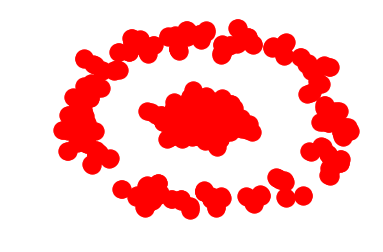

In [15]:
# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=all_test_disease,
                       node_color='r',
                       node_size=1,
                   alpha=0.2)

nx.draw_networkx_nodes(G,pos,
                       nodelist=G.nodes-all_test_disease,
                       node_color='b',
                       node_size=2,
                   alpha=1)

nx.draw(G,pos)

plt.axis('off')
# plt.savefig("visual3.png") # save as png
plt.show()

In [8]:
%matplotlib inline

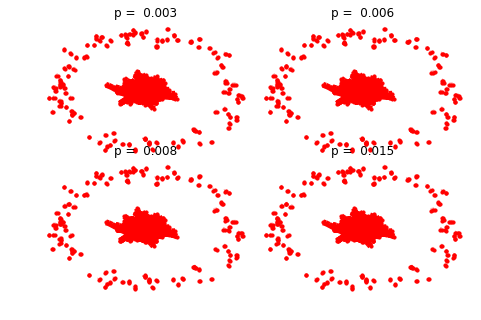

In [12]:
pvals = [0.003, 0.006, 0.008, 0.015]

region = 220  # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)

for p in pvals:
    region += 1
    plt.subplot(region)
    plt.title("p = %6.3f" % (p))
    nx.draw(G, pos,
            with_labels=False,
            node_size=10
           )
    # identify largest connected component
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    G0 = Gcc[0]
    nx.draw_networkx_edges(G0, pos,
                           with_labels=False,
                           edge_color='r',
                           width=6.0
                          )
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(Gi, pos,
                                   with_labels=False,
                                   edge_color='r',
                                   alpha=0.3,
                                   width=5.0
                                  )
plt.show()

In [16]:
test_1_disease = test_1[test_1["Target"] == 1]
test_1_non_disease = test_1 - test_1_disease
X_disease = test_1_disease["Average Shortest Path to all Disease genes"]
X_non_disease = test_1_non_disease["Average Shortest Path to all Disease genes"]
Y = test_1["Target"]

plt.scatter(X_disease, Y, color='r')
plt.scatter(X_non_disease, Y, color='g')
plt.xlabel('Average SP')
plt.ylabel('Predicted Value')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'